## Importing Packages 

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# ML Preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


# Regression Baseline
from sklearn.dummy import DummyRegressor


# Regression Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


# Regression Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Classification Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Hyper-Parameter Tunning
from sklearn.model_selection import GridSearchCV

#Plot
import plotly.express as px

# Pipelines
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


# Loading and saving models
import pickle

## Loading Dataset 

In [ ]:
# Read the dataset
df = pd.read_csv("/content/Gathern.xlsx - Sheet1.csv" )
df.head()

title  space  normal_price  views_count        lat        lng  \
0  Chalet    250           890       165160  24.920518  46.807296   
1  Chalet    250           890       166069  24.920518  46.807296   
2  Chalet    250          1200       167359  24.920518  46.807296   
3  Chalet    250          1400       168279  24.920518  46.807296   
4  Chalet    250           960       168406  24.920518  46.807296   

   booking_count   address elevator internet  ... playground tent pool  \
0              6  Ar Rimal       No       No  ...         No   No  Yes   
1              7  Ar Rimal       No       No  ...         No   No  Yes   
2              8  Ar Rimal       No       No  ...         No   No  Yes   
3             10  Ar Rimal       No       No  ...         No   No  Yes   
4             10  Ar Rimal       No       No  ...         No   No  Yes   

  bbq_corner kitchen_equipments                guests     bed  \
0         No                 No  Singles and Families  Master   
1         No                 No  Singles and Families  Master   
2         No                 No  Singles and Families  Master   
3         No                 No  Singles and Families  Master   
4         No                 No  Singles and Families  Master   

  spacing_category Popularity pricing_category  
0            Small       High         Moderate  
1            Small       High         Moderate  
2            Small       High         Moderate  
3            Small       High        Expensive  
4            Small       High         Moderate  

[5 rows x 37 columns]

In [ ]:
# The dimension of dataset
df.shape

(66945, 37)

In [ ]:
# There are no NaN values
df.isnull().sum()

title                 0
space                 0
normal_price          0
views_count           0
lat                   0
lng                   0
booking_count         0
address               0
elevator              0
internet              0
projector             0
balcony               0
billiardo             0
tv                    0
jacuzzi               0
secure_entrence       0
sprayers              0
sauna                 0
stereo                0
food_court            0
massage_chair         0
garage                0
garden                0
security_office       0
annex                 0
room                  0
view                  0
playground            0
tent                  0
pool                  0
bbq_corner            0
kitchen_equipments    0
guests                0
bed                   0
spacing_category      0
Popularity            0
pricing_category      0
dtype: int64

In [ ]:
# Information about the dataset 
# The dataset have 66,945 entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66945 entries, 0 to 66944
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               66945 non-null  object 
 1   space               66945 non-null  int64  
 2   normal_price        66945 non-null  int64  
 3   views_count         66945 non-null  int64  
 4   lat                 66945 non-null  float64
 5   lng                 66945 non-null  float64
 6   booking_count       66945 non-null  int64  
 7   address             66945 non-null  object 
 8   elevator            66945 non-null  object 
 9   internet            66945 non-null  object 
 10  projector           66945 non-null  object 
 11  balcony             66945 non-null  object 
 12  billiardo           66945 non-null  object 
 13  tv                  66945 non-null  object 
 14  jacuzzi             66945 non-null  object 
 15  secure_entrence     66945 non-null  object 
 16  spra

In [ ]:
# Describe the categorical columns
df.describe(exclude='number')

title   address elevator internet projector balcony billiardo     tv  \
count    66945     66945    66945    66945     66945   66945     66945  66945   
unique       8        26        2        2         2       2         2      2   
top     Chalet  Ar Rimal       No       No        No      No        No    Yes   
freq     30703     18066    55659    50740     62826   64371     66087  44939   

       jacuzzi secure_entrence  ... playground   tent   pool bbq_corner  \
count    66945           66945  ...      66945  66945  66945      66945   
unique       2               2  ...          2      2      2          2   
top         No              No  ...         No     No    Yes         No   
freq     62755           50975  ...      48559  54787  37037      36685   

       kitchen_equipments                guests     bed spacing_category  \
count               66945                 66945   66945            66945   
unique                  2                     3       3                3   
top                    No  Singles and Families  Master         Adequate   
freq                46760                 54238   56103            37026   

       Popularity pricing_category  
count       66945            66945  
unique          3                3  
top        Medium         Moderate  
freq        33472            34414  

[4 rows x 31 columns]

In [ ]:
# Print the unique values for all the categorical columns 
for col in df.describe(exclude='number'):
    print(df[col].unique())

['Chalet' 'Istraha' 'Resort' 'Camp' 'Apartment' 'Farm' 'Villa' 'Room']
['Ar Rimal' 'Al Qirawan' 'Qurtubah' 'Al Mahdiyah' 'Al Aarid' 'Namar'
 'Dirab' 'Ad Diriyah' 'Banban' 'Al Jubaylah' 'Al Amaaria' 'Al Munsiyah'
 'Al Thoumamah' 'Dhahrat Laban' 'An Narjis' 'Al Awali' 'Al Khair'
 'Al Athriyah' 'Al Malqa' 'Dirab ' 'Hittin' 'Al Yasmin' 'An Nahdah'
 'As Sahafah' 'Al Aqiq' 'Al Olaya']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['Singles and Families' 'Families Only' 'Singles Only']
['Master' 'Master and Single' 'Single']
['Small' 'Spacious' 'Adequate']
['High' 'Medium' 'Low']
['Moderate' 'Expensive' 'Affordable']


In [ ]:
# Describe the numeric columns
df.describe()

space   normal_price    views_count           lat           lng  \
count  66945.000000   66945.000000   66945.000000  66945.000000  66945.000000   
mean     946.672657    1184.551707   35809.526731     24.822913     46.642835   
std     2976.557119    2571.295371   61753.181887      0.475521      0.856167   
min        1.000000      76.000000       0.000000      0.000000      0.000000   
25%      131.000000     588.000000    2521.000000     24.775874     46.590316   
50%      300.000000     850.000000   10634.000000     24.835576     46.632803   
75%      500.000000    1300.000000   44708.000000     24.908264     46.781217   
max    50000.000000  400320.000000  761887.000000     25.435562     46.979557   

       booking_count  
count   66945.000000  
mean        2.687759  
std         3.974314  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         5.000000  
max        78.000000

#### Label Encoder

In [ ]:
# Label encoder for the categorical columns 
for i in list(df.columns):
  if str(df[i].dtypes) == "object":
    df[i] = le=LabelEncoder().fit_transform(df[i])

In [ ]:
# The dataframe after the Labelencoder
df.head()

title  space  normal_price  views_count        lat        lng  \
0      2    250           890       165160  24.920518  46.807296   
1      2    250           890       166069  24.920518  46.807296   
2      2    250          1200       167359  24.920518  46.807296   
3      2    250          1400       168279  24.920518  46.807296   
4      2    250           960       168406  24.920518  46.807296   

   booking_count  address  elevator  internet  ...  playground  tent  pool  \
0              6       17         0         0  ...           0     0     1   
1              7       17         0         0  ...           0     0     1   
2              8       17         0         0  ...           0     0     1   
3             10       17         0         0  ...           0     0     1   
4             10       17         0         0  ...           0     0     1   

   bbq_corner  kitchen_equipments  guests  bed  spacing_category  Popularity  \
0           0                   0       2    0                 1           0   
1           0                   0       2    0                 1           0   
2           0                   0       2    0                 1           0   
3           0                   0       2    0                 1           0   
4           0                   0       2    0                 1           0   

   pricing_category  
0                 2  
1                 2  
2                 2  
3                 1  
4                 2  

[5 rows x 37 columns]

#### Features Selection

In [ ]:
# Features >> The columns where selected based on the features importance 
X = df.iloc[:,[0,1,3,4,5,6,7,10,11,12,13,17,19,26,28,29,32,33,34]]

# Target >> pricing_category 
# 0 >> affordable _ 1 >> Expensive _ 2 >> Moderate
y = df.iloc[:,36]

#### Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#### Feature Engineering

In [ ]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler()
X_train_sc = robust.fit_transform(X_train)
X_test_sc = robust.fit_transform(X_test)

***
# ML Classification Section 
***

### Baseline Model

In [ ]:
#The majority class is Moderate by 54%
df['pricing_category'].value_counts(normalize=True)

2    0.514064
1    0.263395
0    0.222541
Name: pricing_category, dtype: float64

### 1st Classification Model : Decision Trees For Classification

In [ ]:
class_tree = DecisionTreeClassifier(criterion='entropy', max_depth= 26)

# Fit the Decision Tree Classifier
class_tree.fit(X_train_sc, y_train)
preds_class = class_tree.predict(X_test_sc)

#### Model  Evaluation

In [ ]:
# Prediction
pred_t = class_tree.predict(X_test_sc)

# Classification report for the Decision Tree
print(classification_report(y_test, pred_t))

              precision    recall  f1-score   support

           0       0.64      0.69      0.67      3736
           1       0.70      0.71      0.70      4430
           2       0.76      0.73      0.75      8571

    accuracy                           0.72     16737
   macro avg       0.70      0.71      0.71     16737
weighted avg       0.72      0.72      0.72     16737



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


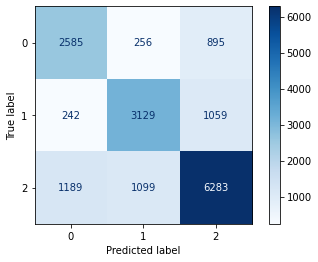

In [ ]:
# Confusion Matrix Plot
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(class_tree, X_test_sc, y_test , cmap='Blues');

### 2nd Classification Model : Random Forest Classifier

In [ ]:
class_forest = RandomForestClassifier(n_estimators = 100, max_depth=25 , criterion = 'entropy')

# Fit the Random Forest Classifier
class_forest.fit(X_train_sc, y_train)
preds_class = class_forest.predict(X_test_sc)

#### Model  Evaluation

In [ ]:
#Prediction
pred_r = class_forest.predict(X_test_sc)

# Classification report for the Random Forest
print( classification_report(y_test, pred_r))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71      3736
           1       0.86      0.71      0.78      4430
           2       0.76      0.87      0.81      8571

    accuracy                           0.78     16737
   macro avg       0.79      0.75      0.77     16737
weighted avg       0.79      0.78      0.78     16737



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


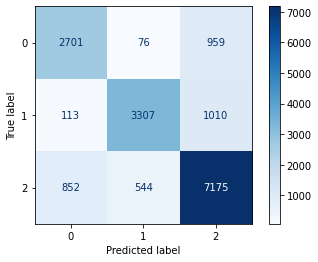

In [ ]:
# Confusion matrix
plot_confusion_matrix( class_forest , X_test_sc, y_test , cmap='Blues');

### 3rd Classification Model : Support Vector For Classification 

In [ ]:
class_sv = SVC(kernel = 'rbf')

# Fit the SVC
class_sv.fit(X_train_sc, y_train)
preds_class = class_sv.predict(X_test_sc)

#### Model  Evaluation

In [ ]:
# Prediction
pred_s = class_sv.predict(X_test_sc)

# Classification report for the SVC
print(classification_report(y_test, pred_s))

              precision    recall  f1-score   support

           0       0.61      0.01      0.01      3779
           1       0.68      0.01      0.02      4324
           2       0.52      1.00      0.68      8634

    accuracy                           0.52     16737
   macro avg       0.60      0.34      0.24     16737
weighted avg       0.58      0.52      0.36     16737



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


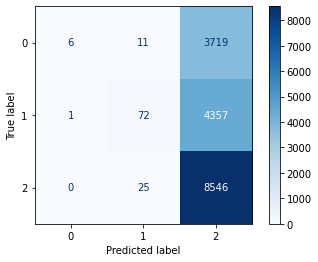

In [ ]:
# Confusion matrix plot
plot_confusion_matrix(class_sv, X_test_sc, y_test , cmap='Blues')

### 4th Classification Model : XGBoost


In [ ]:
classifier = XGBClassifier()

# Fit the XGBoost
classifier.fit(X_train_sc, y_train)
y_pred = classifier.predict(X_test_sc)

#### Model  Evaluation

In [ ]:
# Predictaion 
pred_x = classifier.predict(X_test_sc)

# Classification report for the XGboost
print(classification_report(y_test, pred_x))

              precision    recall  f1-score   support

           0       0.62      0.06      0.11      3779
           1       0.63      0.11      0.19      4324
           2       0.53      0.97      0.69      8634

    accuracy                           0.54     16737
   macro avg       0.59      0.38      0.33     16737
weighted avg       0.58      0.54      0.43     16737



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


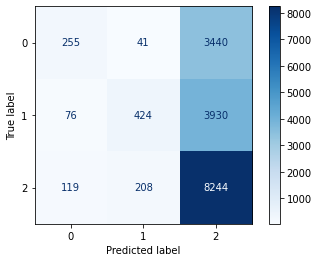

In [ ]:
plot_confusion_matrix(classifier, X=X_test_sc, y_true=y_test, cmap='Blues')

## Classification Analysis Summary

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

Text(0.5, 1.0, 'XGboost Classifier Results')

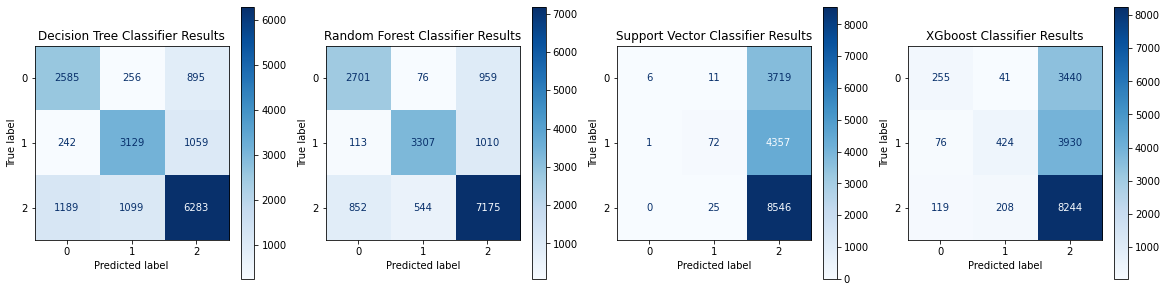

In [ ]:
f, axes = plt.subplots(1, 4, figsize=(20, 5))

# Confusion matrix plot for the tree 
disp_tree = plot_confusion_matrix(class_tree, X_test_sc, y_test, ax= axes[0] , cmap='Blues')
disp_tree.ax_.set_title('Decision Tree Classifier Results')

# Confusion matrix plot for the random forest 
disp_forest = plot_confusion_matrix(class_forest, X_test_sc, y_test, ax= axes[1] , cmap='Blues')
disp_forest.ax_.set_title('Random Forest Classifier Results')

# Confusion matrix plot for the SVC
disp_sv = plot_confusion_matrix(class_sv, X_test_sc, y_test, ax= axes[2] , cmap='Blues')
disp_sv.ax_.set_title('Support Vector Classifier Results')

# Confusion matrix plot for the XGboost
disp_xg = plot_confusion_matrix(classifier, X_test_sc, y_test, ax= axes[3] , cmap='Blues')
disp_xg.ax_.set_title('XGboost Classifier Results')

## Model Optimization - Hyperparameter Tuning 

### Sample data to use in the grid search 

In [ ]:
# Take a 20% sample of the dataset 
sample_X = X.sample(12000)
sample_y = y.sample(12000)

# Split the sample data 
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(sample_X, sample_y)

In [ ]:
# Feature Scaling for the Sample data
X_train_sample_sc = robust.fit_transform(X_train_sample)
X_test_sample_sc = robust.fit_transform(X_test_sample)

#### 1st Decision Tree Optimization

In [ ]:
# Definening parameter range

tree_param_grid = {
     # How deep each decision tree can be
    'max_depth': range(25,35),
    'criterion': ['entropy','gini'],
    'min_samples_split' : range(25,30),
    'min_samples_leaf' : range(1,5)
}

In [ ]:
# The Grid Search CV
tree_grid = GridSearchCV(
    class_tree,
    tree_param_grid,
    cv = 5,
    n_jobs=-1,
    verbose=1
)

# Fit the model
tree_grid.fit(X_train_sample_sc , y_train_sample)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              max_depth=26),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(25, 35),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(25, 30)},
             verbose=1)

In [ ]:
# Grid search cv result 
tree_grid_df = pd.DataFrame(tree_grid.cv_results_)

In [ ]:
# The best parameters for the model
tree_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 29}

In [ ]:
# Best estimator to fit the model again
tree_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=25, min_samples_split=29)

In [ ]:
# Fit the best parameters
best_dtr = DecisionTreeClassifier(criterion='entropy', max_depth=25, min_samples_leaf=2,
                       min_samples_split=29)

best_dtr.fit(X_train_sc, y_train)

# Make a prediction 
best_pred = best_dtr.predict(X_test_sc)

In [ ]:
# Decision Tree score     >> 0.72
# After Grid search score >> 0.70
print(classification_report(y_test, best_pred))

              precision    recall  f1-score   support

           0       0.59      0.65      0.62      3779
           1       0.67      0.67      0.67      4324
           2       0.75      0.71      0.73      8634

    accuracy                           0.69     16737
   macro avg       0.67      0.68      0.67     16737
weighted avg       0.69      0.69      0.69     16737



#### 2nd Random Forest Optimization

In [ ]:
# Hyperparameter Tunning for Random Forest Machine Regressor


# Definening parameter range
reg_param_grid = {
    "n_estimators": [150,200], # How many trees in our forest
    "max_depth": [20,25,30,35], # How deep each decision tree can be
    'criterion': ['entropy','gini']
    
}

reg_grid = GridSearchCV(
    class_forest,
    reg_param_grid,
    cv = 5,
    n_jobs=-1,
    verbose=1,
)

# Fitting the model for grid search
reg_grid.fit(X_train_sample_sc , y_train_sample)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              max_depth=25),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [20, 25, 30, 35],
                         'n_estimators': [150, 200]},
             verbose=1)

In [ ]:
# Get the best parameters to fit it to the model again
reg_grid.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 200}

In [ ]:
# Fit the best parameters
class_forest_grid = RandomForestClassifier(n_estimators = 200, max_depth=20 , criterion = 'entropy' )

# Fit the Random Forest Classifier 
class_forest_grid.fit(X_train_sc, y_train)
preds_class = class_forest_grid.predict(X_test_sc)

In [ ]:
# Random Forest score     >> 0.79
# After Grid search score >> 0.78
print(classification_report(y_test, preds_class))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71      3779
           1       0.81      0.74      0.78      4324
           2       0.77      0.85      0.81      8634

    accuracy                           0.78     16737
   macro avg       0.78      0.75      0.77     16737
weighted avg       0.78      0.78      0.78     16737



#### 3rd Support Vector Machine Optimization

In [ ]:
# Defining parameter range
param_grid = {'C': [100], #100,
              'gamma': [ 0.01], #1, 0.1,
              'kernel': ['rbf']} 
  
svc_grid = GridSearchCV(
    SVC(), 
    param_grid, 
    refit = True,
    verbose = 3)
  
# Fitting the model for grid search
svc_grid.fit(X_train_sc, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.556 total time= 5.2min
[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.561 total time= 4.7min
[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.553 total time= 4.7min
[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.559 total time= 4.6min
[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.553 total time= 4.6min


GridSearchCV(estimator=SVC(),
             param_grid={'C': [100], 'gamma': [0.01], 'kernel': ['rbf']},
             verbose=3)

In [ ]:
# Get the best parameters to fit it to the model again
svc_grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
# Fit the best model

best_svr = SVR(C= 1000 , gamma = 1 , kernel = 'rbf')
best_svr.fit(X_train_sc, y_train)

# Making Predictions
preds_svr = best_svr.predict(X_test_sc)

In [ ]:

print(classification_report(y_test, preds_class))

#### 4th XGboost Optimization

In [ ]:
grid_param = {
    'max_depth': [20], #,25,30
    'n_estimators': [100], # ,150,200
    'learning_rate': [ 0.05] #0.01 ,
}

grid_xg = GridSearchCV(
    classifier,
    grid_param,
    cv = 5,
    n_jobs=-1,
    verbose=1,

)

# Fitting the model for grid search
grid_xg.fit(X_train_sc, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=XGBClassifier(objective='multi:softprob'),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05], 'max_depth': [20],
                         'n_estimators': [100]},
             verbose=1)

In [ ]:
grid_xg.best_params_

{'learning_rate': 0.05, 'max_depth': 20, 'n_estimators': 100}

In [ ]:
best_xg = XGBRegressor(learning_rate = 0.1, max_depth = 23,
                         n_estimators= 9 )

best_xg.fit(X_train_sc, y_train)
preds_xg = class_forest.predict(X_test_sc)

[16:42:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=23, n_estimators=9)

In [ ]:
# XGBoost score     >> 0.53
# After Grid search score >> 
print(classification_report(y_test, preds_xg))

Training accuracy: 0.7274228998233162
Testing accuracy: 0.30528165172194166


### Comparing the random forest before and after the grid search 

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(20, 5))

# Confusion matrix plot for the random forest 
disp_forest = plot_confusion_matrix(class_forest, X_test_sc, y_test, ax= axes[0] , cmap='Blues')
disp_forest.ax_.set_title('Random Forest Classifier Results')

# Confusion matrix plot for the random forest after grid search 
disp_forest_grid = plot_confusion_matrix(class_forest_grid, X_test_sc, y_test, ax= axes[1] , cmap='Blues')
disp_forest_grid.ax_.set_title('Random Forest Classifier Results After Grid Search')

# ML Regression : Our attempts in the regression models 

## Sampling the Dataset Based on The Pricing Category Column

## Low Price Dataset

In [ ]:
# Sample of the low prices dataset 
low_price = df[df['pricing_category'] == 0]
low_price.head()

title  space  normal_price  views_count        lat        lng  \
290      2    300           490        18009  24.919746  46.807529   
291      2    300           490        18813  24.919746  46.807529   
292      2    300           590        20194  24.919746  46.807529   
293      2    300           690        21557  24.919746  46.807529   
294      2    300           490        21737  24.919746  46.807529   

     booking_count  address  elevator  internet  ...  playground  tent  pool  \
290              2       17         0         0  ...           1     0     1   
291              3       17         0         0  ...           1     0     1   
292              5       17         0         0  ...           1     0     1   
293              5       17         0         0  ...           1     0     1   
294              5       17         0         0  ...           1     0     1   

     bbq_corner  kitchen_equipments  guests  bed  spacing_category  \
290           0                   0       2    0                 0   
291           0                   0       2    0                 0   
292           0                   0       2    0                 0   
293           0                   0       2    0                 0   
294           0                   0       2    0                 0   

     Popularity  pricing_category  
290           2                 0  
291           2                 0  
292           2                 0  
293           2                 0  
294           2                 0  

[5 rows x 37 columns]

#### Features Selection for the sample 

In [ ]:
###################### Low Price #####################

# Features >> The columns where selected based on the features importance 
X_low = low_price.iloc[:,[0,1,3,4,5,6,7,10,11,12,13,17,19,26,28,29,32,33,34]]

# Target >> normal price
y_low = low_price.iloc[:,2] 

### Split Data

In [ ]:
# Spliting the sample low price dataset into traning and testing



X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(X_low, y_low, train_size=0.75 ,random_state = 42)

### Feature Engineering and Feature Selection

In [ ]:
# Feature scaling for the features in the train and the test 
scaler = StandardScaler()


X_train_low_sc = scaler.fit_transform(X_train_low)
X_test_low_sc = scaler.fit_transform(X_test_low)

***
### ML Regression Section 
***

#### Baseline Model

In [ ]:
# Baseline --> is RMSE --> 1.0
# Whenever I build a model, RMSE needs to be less than 1.0


# Create a dummy regressor
dummy_reg = DummyRegressor(strategy='mean')


# Fit it on the training set
dummy_reg.fit(X_train_low, y_train_low)


# Make predictions on the test set
y_pred_b = dummy_reg.predict(X_test_low)


# Calculate root mean squared error
print("Dummy RMSE: %f" % (np.sqrt(mean_squared_error(y_test_low, y_pred_b))))

Dummy RMSE: 2141.863586


#### Train Models

#### 1st Regression Model: Decision Tree

In [ ]:
# Decision Tree Regressor

dtr = DecisionTreeRegressor( max_depth= 8 , criterion= 'mse')
dtr.fit(X_train_low_sc, y_train_low)

# Making Predictions
pred_dt = dtr.predict(X_test_low_sc)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


#### Decision Tree Evaluation

In [ ]:
# Decision Tree Regressor

print("R2: %f" % (r2_score(y_test_low, pred_dt)))
print("MSE: %f" % (mean_squared_error(y_test_low, pred_dt)))
print("MAE: %f" % (mean_absolute_error(y_test_low, pred_dt)))
print("RMSE: %f" % (np.sqrt(mean_squared_error(y_test_low, pred_dt))))

R2: 0.304404
MSE: 3191072.302493
MAE: 520.169366
RMSE: 1786.357272


In [ ]:

print('Training accuracy:', dtr.score(X_train_low_sc, y_train_low))
print('Testing accuracy:', dtr.score(X_test_low_sc, y_test_low))

Training accuracy: 0.9588208030050399
Testing accuracy: 0.30440405921730673


#### 2nd Regression Model: Random Forest Regressor

In [ ]:
# Random Forest Regressor

rfr = RandomForestRegressor(n_estimators=30 , max_depth= 8 , criterion = 'mse' , random_state = 42)
rfr.fit(X_train_low_sc, y_train_low)

# Making Predictions
pred_fr = rfr.predict(X_test_low_sc)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


#### 2nd Random Forest Evaluation

In [ ]:
# Random Forest Regressor

print("R2: %f" % (r2_score(y_test_low, pred_fr)))

print('Training accuracy:', rfr.score(X_train_low_sc, y_train_low))
print('Testing accuracy:', rfr.score(X_test_low_sc, y_test_low))

R2: 0.452638
Training accuracy: 0.9526063619101269
Testing accuracy: 0.45263836189527085


#### 3rd Regression Model: XGboost 

In [ ]:
# XGboost

Xgb_reg=XGBRegressor(objective = 'reg:linear',
                         n_estimators= 80 , subsample = 0.75)
# Fit the Model
Xgb_reg.fit(X_train_low_sc, y_train_low)

# Making Predictions
pred_xg = Xgb_reg.predict(X_test_low_sc)

[16:24:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


#### XGBoost Evaluation

In [ ]:
# XGBoost

print("R2: %f" % (r2_score(y_test_low, pred_xg)))
print("MSE: %f" % (mean_squared_error(y_test_low, pred_xg)))
print("MAE: %f" % (mean_absolute_error(y_test_low, pred_xg)))
print("RMSE: %f" % (np.sqrt(mean_squared_error(y_test_low, pred_xg))))

R2: 0.427422
MSE: 2626723.180318
MAE: 494.734036
RMSE: 1620.716872


In [ ]:
print('Training accuracy:', Xgb_reg.score(X_train_low_sc, y_train_low))
print('Testing accuracy:', Xgb_reg.score(X_test_low_sc, y_test_low))

Training accuracy: 0.874251959982447
Testing accuracy: 0.4274219420343013


#### 4th Regression Model: Support Vector Machine

In [ ]:
# Fit the Model
reg_svr = SVR(kernel = 'linear')
reg_svr.fit(X_train_low_sc, y_train_low)

# Making Predictions
preds_svr = reg_svr.predict(X_test_low_sc)

#### Support Vector Machine Evaluation

In [ ]:
print("R2: %f" % (r2_score(y_test_low, preds_svr)))
print('Training accuracy:', reg_svr.score(X_train_low_sc, y_train_low))
print('Testing accuracy:', reg_svr.score(X_test_low_sc, y_test_low))

R2: 0.079545
Training accuracy: 0.0666657566426192
Testing accuracy: 0.07954538520154764


#### Model Selection 

In [ ]:
# Dataframe to sort our models by RMSE
# Sort from low RMSE to high RMSE
dtr_rmse = np.sqrt(mean_squared_error(y_test_low, pred_dt))
rfr_rmse = np.sqrt(mean_squared_error(y_test_low, pred_fr))
Xg_rmse = np.sqrt(mean_squared_error(y_test_low, pred_xg))
svm_rmse = np.sqrt(mean_squared_error(y_test_low, preds_svr))
reg_models = pd.DataFrame({
    'Model': ['Decision Tree Regressor',
              'Random Forest Regressor', 'XGBoost Regressor' , 'SVM Regressor'],
    
    'RMSE': [ dtr_rmse ,  rfr_rmse , Xg_rmse , svm_rmse ]})

reg_models.sort_values(by='RMSE', ascending=True)

Model         RMSE
1  Random Forest Regressor  1584.626743
2        XGBoost Regressor  1620.716872
0  Decision Tree Regressor  1786.357272
3            SVM Regressor  2054.901421

#### Model Optimization - Hyperparameter Tuning using Grid Search

#### 1st Decision Tree Optimization

In [ ]:
# Definening parameter range

tree_param_grid = {
     # How deep each decision tree can be
    'max_depth': range(25,30) ,
    'min_samples_split' : range(25,30),
    'min_samples_leaf' : range(1,5)
}

In [ ]:
tree_grid = GridSearchCV(
    rfr,
    tree_param_grid,
    cv = 5,
    n_jobs=-1,
    verbose=1,
    scoring="neg_mean_absolute_error"
)

# Fit the model
tree_grid.fit(X_train_low , y_train_low)

In [ ]:
# Grid search cv result 
tree_grid_df = pd.DataFrame(tree_grid.cv_results_)

In [ ]:
tree_parameters = ['param_max_depth','mean_test_score','rank_test_score']

# Sort the result of the best parameters
tree_grid_df[tree_parameters].sort_values(by = ['rank_test_score'])

In [ ]:
# Get the best parameters to fit it to the model again

tree_grid.best_params_

In [ ]:
# Fit the best parameters

best_dtr = DecisionTreeRegressor( max_depth= 25 ,min_samples_split = 25 ,criterion= 'mse')
best_dtr.fit(X_train_low_sc, y_train_low)

# Make a prediction 

best_pred = best_dtr.predict(X_test_low_sc)

In [ ]:
# Decision Tree score     >> 0.79
# After Grid search score >> 0.80
print('Training accuracy:', best_dtr.score(X_train_low_sc, y_train_low))
print('Testing accuracy:', best_dtr.score(X_test_low_sc, y_test_low))

#### Random Forest Optimization

In [ ]:
# Hyperparameter Tunning for Random Forest Machine Regressor


# Definening parameter range
reg_param_grid = {
    "n_estimators": range(5,25), # How many trees in our forest
    "max_depth": range(10,25) # How deep each decision tree can be
    
}

reg_grid = GridSearchCV(
    rfr,
    reg_param_grid,
    cv = 5,
    n_jobs=-1,
    verbose=1,
    scoring="neg_mean_absolute_error"
)

# Fitting the model for grid search
reg_grid.fit(X_train_low_sc , y_train_low)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(criterion='mse', max_depth=8,
                                             n_estimators=30, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(10, 25),
                         'n_estimators': range(5, 25)},
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
reg_grid_df = pd.DataFrame(reg_grid.cv_results_)

In [ ]:
reg_parameters = ['param_max_depth','param_n_estimators','mean_test_score','rank_test_score']

reg_grid_df[reg_parameters].sort_values(by = ['rank_test_score'])

param_max_depth param_n_estimators  mean_test_score  rank_test_score
239              21                 24      -174.870177                1
238              21                 23      -174.884994                2
237              21                 22      -175.198270                3
159              17                 24      -175.342070                4
158              17                 23      -175.537716                5
..              ...                ...              ...              ...
10               10                 15      -239.768856              296
2                10                  7      -240.130948              297
13               10                 18      -240.331045              298
11               10                 16      -240.439393              299
3                10                  8      -240.746904              300

[300 rows x 4 columns]

In [ ]:
# Get the best parameters to fit it to the model again

reg_grid.best_params_

{'max_depth': 21, 'n_estimators': 24}

In [ ]:
# Fit the best parameters
best_rfr = RandomForestRegressor(n_estimators=5 , max_depth= 35 , criterion = 'mse' , random_state = 42)
best_rfr.fit(X_train_low_sc, y_train_low)
y_pred = best_rfr.predict(X_test_low_sc)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


In [ ]:
# Random Forest score     >> 0.81
# After Grid search score >> 0.82
print('Training accuracy:', best_rfr.score(X_train_low_sc, y_train_low))
print('Testing accuracy:', best_rfr.score(X_test_low_sc, y_test_low))

Training accuracy: 0.9757216479639805
Testing accuracy: 0.41512806485273024


#### 3rd XGboost Optimization

In [ ]:
reg_grid_param = {
    'max_depth': range(21,30),
    'n_estimators': range(5, 10),
    'learning_rate': [0.1, 0.01 , 0.05]
}

grid_xg = GridSearchCV(
    Xgb_reg,
    reg_grid_param,
    cv = 5,
    n_jobs=-1,
    verbose=1,
    scoring="neg_mean_absolute_error"
)

# Fitting the model for grid search
grid_xg.fit(X_train_low_sc, y_train_low)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
[16:42:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, estimator=XGBRegressor(n_estimators=80, subsample=0.75),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(21, 30),
                         'n_estimators': range(5, 10)},
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
xg_grid_df = pd.DataFrame(grid_xg.cv_results_)

In [ ]:
xg_parameters = ['mean_test_score','rank_test_score']

xg_grid_df[xg_parameters].sort_values(by = ['rank_test_score'])

mean_test_score  rank_test_score
9       -512.526923                1
4       -512.545079                2
19      -512.560330                3
14      -512.561126                4
34      -512.564102                5
..              ...              ...
60     -1174.062602              128
85     -1174.062602              128
75     -1174.062602              128
45     -1174.062754              134
50     -1174.062868              135

[135 rows x 2 columns]

In [ ]:
grid_xg.best_params_

{'learning_rate': 0.1, 'max_depth': 22, 'n_estimators': 9}

In [ ]:
best_xg = XGBRegressor(learning_rate = 0.1, max_depth = 23,
                         n_estimators= 9 )

best_xg.fit(X_train_low_sc, y_train_low)

[16:42:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=23, n_estimators=9)

In [ ]:
# XGBoost score     >> 0.56
# After Grid search score >> 0.48
print('Training accuracy:', best_xg.score(X_train_low_sc, y_train_low))
print('Testing accuracy:', best_xg.score(X_test_low_sc, y_test_low))

Training accuracy: 0.7274228998233162
Testing accuracy: 0.30528165172194166


#### 4th Support Vector Machine Optimization

In [ ]:
# defining parameter range
svr_param = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 


grid_svr = GridSearchCV(reg_svr, 
                    svr_param, 
                    refit = True, 
                    verbose = 3)

# Fitting the model for grid search
grid_svr.fit(X_train_low_sc, y_train_low)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.039 total time=   7.5s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.035 total time=   7.4s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.019 total time=   7.3s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.025 total time=   8.5s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.028 total time=   7.4s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.039 total time=   7.2s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.034 total time=   7.3s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.019 total time=   7.3s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.024 total time=   7.2s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.027 total time=   7.2s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.038 total time=   7.2s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
svr_grid_df = pd.DataFrame(grid_svr.cv_results_)

svr_grid_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       6.098413      0.453368         1.521155        0.011265     0.1   
1       5.708927      0.033505         1.520738        0.007882     0.1   
2       5.976790      0.484448         1.552225        0.048539     0.1   
3       5.737201      0.033093         1.502274        0.009475     0.1   
4       5.941180      0.518681         1.489455        0.012246     0.1   

  param_gamma param_kernel                                        params  \
0           1          rbf       {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}   
1         0.1          rbf     {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}   
2        0.01          rbf    {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}   
3       0.001          rbf   {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}   
4      0.0001          rbf  {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0          -0.039244          -0.034554          -0.019063          -0.024710   
1          -0.038530          -0.033539          -0.018635          -0.024116   
2          -0.038013          -0.033370          -0.018324          -0.023694   
3          -0.038621          -0.034530          -0.019121          -0.024771   
4          -0.038760          -0.034763          -0.019247          -0.024941   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0          -0.028313        -0.029177        0.007117               24  
1          -0.027128        -0.028389        0.006991               21  
2          -0.026602        -0.028000        0.006974               20  
3          -0.028350        -0.029079        0.006914               23  
4          -0.028631        -0.029268        0.006926               25

In [ ]:
svr_parameters = ['mean_test_score','rank_test_score']

svr_grid_df[svr_parameters].sort_values(by = ['rank_test_score'])

mean_test_score  rank_test_score
20         0.407296                1
21         0.382368                2
22         0.206993                3
16         0.116642                4
17         0.090443                5
15         0.089628                6
23         0.085073                7
24         0.050737                8
18         0.049168                9
12         0.036235               10
11         0.026898               11
10        -0.000721               12
19        -0.003372               13
13        -0.004253               14
7         -0.011256               15
6         -0.012626               16
5         -0.026540               17
14        -0.027023               18
8         -0.027163               19
2         -0.028000               20
1         -0.028389               21
9         -0.029068               22
3         -0.029079               23
0         -0.029177               24
4         -0.029268               25

In [ ]:
grid_svr.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
# Fit the best model

best_svr = SVR(C= 1000 , gamma = 1 , kernel = 'rbf')
best_svr.fit(X_train_low_sc, y_train_low)

# Making Predictions
preds_svr = best_svr.predict(X_test_low_sc)

In [ ]:
# Sppurt Vector Machine score >> 0.019
# After Grid search score >> 0.66
print('Training accuracy:', best_svr.score(X_train_low_sc, y_train_low))
print('Testing accuracy:', best_svr.score(X_test_low_sc, y_test_low))

Training accuracy: 0.44531627715992383
Testing accuracy: 0.5067864949464281


#### The best model we have is the random forest  

In [ ]:
pred = best_rfr.predict(X_test_low_sc)

In [ ]:
# Creating a dataframe for the acutal and the predict price 
test_dataset = pd.DataFrame(y_test_low)
test_dataset['normal_price_predict'] = pred
test_dataset['Percent Error'] = (((test_dataset['normal_price_predict']-test_dataset['normal_price']))/test_dataset['normal_price'])*100
test_dataset

normal_price  normal_price_predict  Percent Error
39501           250            483.200000      93.280000
40815           500            561.333333      12.266667
35599           800           1160.000000      45.000000
45191           350            339.800000      -2.914286
13262          2200           2200.000000       0.000000
...             ...                   ...            ...
15568           600            574.000000      -4.333333
25221          1000           1310.000000      31.000000
36374         15000          11180.000000     -25.466667
37379          1950           1630.000000     -16.410256
30701           900            401.800000     -55.355556

[3725 rows x 3 columns]

In [ ]:
# Box Plot For The Percent Error
px.box(test_dataset,
       x='Percent Error')

In [ ]:
# Delete the outlier prediction
# First quartile (Q1)
Q1 = np.percentile(test_dataset['Percent Error'], 25, interpolation = 'midpoint')

# Third quartile (Q3)
Q3 = np.percentile(test_dataset['Percent Error'], 75, interpolation = 'midpoint')

# Interquaritle range (IQR)
IQR = Q3 - Q1

# lower bound outliers 
# higher bound outliers

higher_bound_train = Q3 + 1.5*(IQR)

print('higher bound outliers :', higher_bound_train)


higher bound outliers : 131.02564102564102


In [ ]:
test_dataset = test_dataset[test_dataset['Percent Error'] < higher_bound_train]

In [ ]:
# Box Plot For The Percent Error Without The Outliers
px.box(test_dataset, x='Percent Error')

## Moderate Price Dataset

In [ ]:
mod_price = df[df['pricing_category'] == 2]
mod_price.head()

title  space  normal_price  views_count        lat        lng  \
0      2    250           890       165160  24.920518  46.807296   
1      2    250           890       166069  24.920518  46.807296   
2      2    250          1200       167359  24.920518  46.807296   
4      2    250           960       168406  24.920518  46.807296   
5      2    250           800       168644  24.920518  46.807296   

   booking_count  address  elevator  internet  ...  playground  tent  pool  \
0              6       17         0         0  ...           0     0     1   
1              7       17         0         0  ...           0     0     1   
2              8       17         0         0  ...           0     0     1   
4             10       17         0         0  ...           0     0     1   
5              6       17         0         0  ...           0     0     1   

   bbq_corner  kitchen_equipments  guests  bed  spacing_category  Popularity  \
0           0                   0       2    0                 1           0   
1           0                   0       2    0                 1           0   
2           0                   0       2    0                 1           0   
4           0                   0       2    0                 1           0   
5           0                   0       2    0                 1           0   

   pricing_category  
0                 2  
1                 2  
2                 2  
4                 2  
5                 2  

[5 rows x 37 columns]

In [ ]:
###################### Med Price #####################

# Features >> Select everything for the features exept normal_price and pricing category 
X_mod = mod_price.iloc[:,[0,1,3,4,5,6,7,10,11,12,13,17,19,26,28,29,32,33,34]]
# Target >> normal price
y_mod = mod_price.iloc[:,2] 

In [ ]:
###################### Med Price #####################

X_train_mod, X_test_mod, y_train_mod, y_test_mod = train_test_split(X_mod, y_mod, train_size=0.75 ,random_state = 42)

### Feature Engineering and Feature Selection

In [ ]:
# Feature scaling for the feature train and the test 
scaler = StandardScaler()
X_train_mod_sc = scaler.fit_transform(X_train_mod)
X_test_mod_sc = scaler.fit_transform(X_test_mod)

***
### ML Regression Section 
***

#### Baseline Model

In [ ]:
# Baseline --> is RMSE --> 1.0
# Whenever I build a model, RMSE needs to be less than 1.0


# Create a dummy regressor
dummy_reg = DummyRegressor(strategy='mean')


# Fit it on the training set
dummy_reg.fit(X_train_mod, y_train_mod)


# Make predictions on the test set
y_pred_b = dummy_reg.predict(X_test_mod)


# Calculate root mean squared error
print("Dummy RMSE: %f" % (np.sqrt(mean_squared_error(y_test_mod, y_pred_b))))

Dummy RMSE: 1324.249335


#### Train Models

####1st Regression Model: Decision Tree

In [ ]:
# Decision Tree Regressor

dtr = DecisionTreeRegressor( max_depth= 6 , criterion= 'mse' , random_state=42)
dtr.fit(X_train_mod_sc, y_train_mod)

# Making Predictions
pred_dt = dtr.predict(X_test_mod_sc)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.



#### 1st Decision Tree Evaluation

In [ ]:
# Decision Tree Regressor

print("R2: %f" % (r2_score(y_test_mod, pred_dt)))
print("MSE: %f" % (mean_squared_error(y_test_mod, pred_dt)))
print("MAE: %f" % (mean_absolute_error(y_test_mod, pred_dt)))
print("RMSE: %f" % (np.sqrt(mean_squared_error(y_test_mod, pred_dt))))

R2: 0.567852
MSE: 757697.007339
MAE: 404.117628
RMSE: 870.457930


In [ ]:

print('Training accuracy:', dtr.score(X_train_mod_sc, y_train_mod))
print('Testing accuracy:', dtr.score(X_test_mod_sc, y_test_mod))

Training accuracy: 0.8113958929122269
Testing accuracy: 0.5678518775806343


#### 2nd Regression Model: Random Forest Regressor

In [ ]:
# Random Forest Regressor

rfr = RandomForestRegressor(n_estimators=54 , max_depth= 30 )
rfr.fit(X_train_mod_sc, y_train_mod)

# Making Predictions
pred_fr = rfr.predict(X_test_mod_sc)

#### 2nd Random Forest Evaluation

In [ ]:
# Random Forest Regressor

print("R2: %f" % (r2_score(y_test_mod, pred_fr)))

# The score or accuracy
print('Training accuracy:', rfr.score(X_train_mod_sc, y_train_mod))
print('Testing accuracy:', rfr.score(X_test_mod_sc, y_test_mod))

R2: 0.761634
Training accuracy: 0.9538319535772611
Testing accuracy: 0.7616341238550515


#### 3rd Regression Model: XGboost 

In [ ]:
# XGboost

Xgb_reg=XGBRegressor(objective = 'reg:linear',
                         n_estimators= 52 , subsample = 0.75)
# Fit the Model
Xgb_reg.fit(X_train_mod_sc, y_train_mod)

# Making Predictions
pred_xg = Xgb_reg.predict(X_test_mod_sc)

[16:59:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


#### XGBoost Evaluation

In [ ]:
# XGBoost

print("R2: %f" % (r2_score(y_test_mod, pred_xg)))

# The score of accuracy
print('Training accuracy:', Xgb_reg.score(X_train_mod_sc, y_train_mod))
print('Testing accuracy:', Xgb_reg.score(X_test_mod_sc, y_test_mod))

R2: 0.279878
Training accuracy: 0.6966315033904932
Testing accuracy: 0.2798784865556301


#### 4th Regression Model: Support Vector Machine

In [ ]:
# Fit the Model
reg_svr = SVR(kernel = 'rbf')
reg_svr.fit(X_train_mod_sc, y_train_mod)

# Making Predictions
preds_svr = reg_svr.predict(X_test_mod_sc)

#### Support Vector Machine Evaluation

In [ ]:
print("R2: %f" % (r2_score(y_test_mod, preds_svr)))

# The score of accuracy
print('Training accuracy:', reg_svr.score(X_train_mod_sc, y_train_mod))
print('Testing accuracy:', reg_svr.score(X_test_mod_sc, y_test_mod))

R2: 0.022212
Training accuracy: 0.010201563625985677
Testing accuracy: 0.022211894570340673


#### Model Selection 

In [ ]:
# Dataframe to sort our models by RMSE
# Sort from low RMSE to high RMSE
dtr_rmse = np.sqrt(mean_squared_error(y_test_mod, pred_dt))
rfr_rmse = np.sqrt(mean_squared_error(y_test_mod, pred_fr))
Xg_rmse = np.sqrt(mean_squared_error(y_test_mod, pred_xg))
svm_rmse = np.sqrt(mean_squared_error(y_test_mod, preds_svr))
reg_models = pd.DataFrame({
    'Model': ['Decision Tree Regressor',
              'Random Forest Regressor', 'XGBoost Regressor' , 'SVM Regressor'],
    
    'RMSE': [ dtr_rmse ,  rfr_rmse , Xg_rmse , svm_rmse ]})

reg_models.sort_values(by='RMSE', ascending=True)

Model         RMSE
1  Random Forest Regressor   646.477646
0  Decision Tree Regressor   870.457930
2        XGBoost Regressor  1123.658557
3            SVM Regressor  1309.344251

#### Model Optimization - Hyperparameter Tuning using Grid Search

#### 1st Decision Tree Optimization

In [ ]:
# Definening parameter range

tree_param_grid = {
     # How deep each decision tree can be
    'max_depth': range(15,24) ,
    'min_samples_split' : range(1,25),
    'min_samples_leaf' : range(1,5)
}

In [ ]:
tree_grid = GridSearchCV(
    rfr,
    tree_param_grid,
    cv = 5,
    n_jobs=-1,
    verbose=1,
    scoring="neg_mean_absolute_error"
)

# Fit the model
tree_grid.fit(X_train_mod_sc , y_train_mod)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


180 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=30, n_estimators=54),
             n_jobs=-1,
             param_grid={'max_depth': range(15, 24),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 25)},
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
# Grid search cv result 
tree_grid_df = pd.DataFrame(tree_grid.cv_results_)

In [ ]:
tree_parameters = ['param_max_depth','mean_test_score','rank_test_score']

# Sort the result of the best parameters
tree_grid_df[tree_parameters].sort_values(by = ['rank_test_score'])

param_max_depth  mean_test_score  rank_test_score
775              23      -165.039159                1
774              23      -165.356479                2
678              22      -165.554372                3
581              21      -165.703333                4
582              21      -165.705874                5
..              ...              ...              ...
96               16              NaN              860
840              23              NaN              861
408              19              NaN              862
456              19              NaN              863
0                15              NaN              864

[864 rows x 3 columns]

In [ ]:
# Get the best parameters to fit it to the model again

tree_grid.best_params_

{'max_depth': 23, 'min_samples_leaf': 1, 'min_samples_split': 8}

In [ ]:
# Fit the best parameters

best_dtr = DecisionTreeRegressor( max_depth= 23)
best_dtr.fit(X_train_mod_sc, y_train_mod)

# Make a prediction 

best_pred = best_dtr.predict(X_test_mod_sc)

In [ ]:
# Decision Tree score     >> 0.70
# After Grid search score >> 0.71
print('Training accuracy:', best_dtr.score(X_train_mod_sc, y_train_mod))
print('Testing accuracy:', best_dtr.score(X_test_mod_sc, y_test_mod))

Training accuracy: 0.9984881352356951
Testing accuracy: 0.6389510072243816


### Random Forest Optimization

In [ ]:
# Hyperparameter Tunning for Random Forest Machine Regressor


# Definening parameter range
reg_param_grid = {
    "n_estimators": range(25,150), # How many trees in our forest
    "max_depth": range(10,35) # How deep each decision tree can be
    
}

reg_grid = GridSearchCV(
    rfr,
    reg_param_grid,
    cv = 5,
    n_jobs=-1,
    verbose=1,
    scoring="neg_mean_absolute_error"
)

# Fitting the model for grid search
reg_grid.fit(X_train_mod_sc , y_train_mod)

Fitting 5 folds for each of 3125 candidates, totalling 15625 fits


In [ ]:
reg_grid_df = pd.DataFrame(reg_grid.cv_results_)

In [ ]:
reg_parameters = ['param_max_depth','param_n_estimators','mean_test_score','rank_test_score']

reg_grid_df[reg_parameters].sort_values(by = ['rank_test_score'])

In [ ]:
# Get the best parameters to fit it to the model again

reg_grid.best_params_

In [ ]:
# Fit the best parameters
best_rfr = RandomForestRegressor(n_estimators=5 , max_depth= 35 , criterion = 'mse' , random_state = 42)
best_rfr.fit(X_train_mod_sc, y_train_mod)
y_pred = best_rfr.predict(X_test_mod_sc)

In [ ]:
# Random Forest score     >> 0.81
# After Grid search score >> 0.82
print('Training accuracy:', best_rfr.score(X_train_mod_sc, y_train_mod))
print('Testing accuracy:', best_rfr.score(X_test_mod_sc, y_test_mod))

### 3rd XGboost Optimization

In [ ]:
reg_grid_param = {
    'max_depth': range(21,30),
    'n_estimators': range(5, 10),
    'learning_rate': [0.1, 0.01 , 0.05]
}

grid_xg = GridSearchCV(
    Xgb_reg,
    reg_grid_param,
    cv = 5,
    n_jobs=-1,
    verbose=1,
    scoring="neg_mean_absolute_error"
)

# Fitting the model for grid search
grid_xg.fit(X_train_mod_sc, y_train_mod)

In [ ]:
xg_grid_df = pd.DataFrame(grid_xg.cv_results_)

In [ ]:
xg_parameters = ['mean_test_score','rank_test_score']

xg_grid_df[xg_parameters].sort_values(by = ['rank_test_score'])

In [ ]:
grid_xg.best_params_

In [ ]:
best_xg = XGBRegressor(learning_rate = 0.1, max_depth = 23,
                         n_estimators= 9 )

best_xg.fit(X_train_mod_sc, y_train_mod)

In [ ]:
# XGBoost score     >> 0.56
# After Grid search score >> 0.48
print('Training accuracy:', best_xg.score(X_train_mod_sc, y_train_mod))
print('Testing accuracy:', best_xg.score(X_test_mod_sc, y_test_mod))

### 4th Support Vector Machine Optimization

In [ ]:
# defining parameter range
svr_param = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 


grid_svr = GridSearchCV(reg_svr, 
                    svr_param, 
                    refit = True, 
                    verbose = 3)

# Fitting the model for grid search
grid_svr.fit(X_train_mod_sc, y_train_mod)

In [ ]:
svr_grid_df = pd.DataFrame(grid_svr.cv_results_)

svr_grid_df.head()

In [ ]:
svr_parameters = ['mean_test_score','rank_test_score']

svr_grid_df[svr_parameters].sort_values(by = ['rank_test_score'])

In [ ]:
grid_svr.best_params_

In [ ]:
# Fit the best model

best_svr = SVR(C= 1000 , gamma = 1 , kernel = 'rbf')
best_svr.fit(X_train_mod_sc, y_train_mod)

# Making Predictions
preds_svr = best_svr.predict(X_test_mod_sc)

In [ ]:
# Sppurt Vector Machine score >> 0.019
# After Grid search score >> 0.66
print('Training accuracy:', best_svr.score(X_train_mod_sc, y_train_mod))
print('Testing accuracy:', best_svr.score(X_test_mod_sc, y_test_mod))

### The Best Model We Have is The Random Forest  

In [ ]:
pred2 = best_rfr.predict(X_test_mod_sc)

In [ ]:
# Creating a dataframe for the acutal and the predict price 
test_dataset = pd.DataFrame(y_test_mod)
test_dataset['normal_price_predict'] = pred2
test_dataset['Percent Error'] = (((test_dataset['normal_price_predict']-test_dataset['normal_price']))/test_dataset['normal_price'])*100
test_dataset

In [ ]:
# Box Plot For The Percent Error
px.box(test_dataset,
       x='Percent Error')

In [ ]:
# Delete the outlier prediction
# First quartile (Q1)
Q1 = np.percentile(test_dataset['Percent Error'], 25, interpolation = 'midpoint')

# Third quartile (Q3)
Q3 = np.percentile(test_dataset['Percent Error'], 75, interpolation = 'midpoint')

# Interquaritle range (IQR)
IQR = Q3 - Q1

# lower bound outliers 
# higher bound outliers

higher_bound_train = Q3 + 1.5*(IQR)

print('higher bound outliers :', higher_bound_train)


In [ ]:
test_dataset = test_dataset[test_dataset['Percent Error'] < higher_bound_train]

In [ ]:
# Box Plot For The Percent Error Without The Outliers
px.box(test_dataset, x='Percent Error')

## Expensive Price Dataset

In [ ]:
high_price = df[df['pricing_category'] == 1]
high_price.head()

###Features Selection

In [ ]:
################ High Price ##############

# Features >> Select everything for the features exept normal_price and pricing category 
X_high = high_price.iloc[:,[0,1,3,4,5,6,7,10,11,12,13,17,19,26,28,29,32,33,34]]

# Target >> normal price
y_high = high_price.iloc[:,2] 

### Split The Dataset

In [ ]:
# Expensive Pice dataset split
X_train_hi, X_test_hi, y_train_hi, y_test_hi = train_test_split(X_high, y_high, train_size=0.75 ,random_state = 42)

### Feature Engineering and Feature Selection

In [ ]:
# Feature scaling for the feature train and the test 
scaler = StandardScaler()
X_train_hi_sc = scaler.fit_transform(X_train_hi)
X_test_hi_sc = scaler.fit_transform(X_test_hi)

***
### ML Regression Section 
***

#### Baseline Model

In [ ]:
# Baseline --> is RMSE --> 1.0
# Whenever I build a model, RMSE needs to be less than 1.0


# Create a dummy regressor
dummy_reg = DummyRegressor(strategy='mean')


# Fit it on the training set
dummy_reg.fit(X_train_hi, y_train_hi)


# Make predictions on the test set
y_pred_c = dummy_reg.predict(X_test_hi)


# Calculate root mean squared error
print("Dummy RMSE: %f" % (np.sqrt(mean_squared_error(y_test_hi, y_pred_c))))

#### Train Models

#### 1st Regression Model: Decision Tree

In [ ]:
# Decision Tree Regressor

dtr = DecisionTreeRegressor( max_depth= 6 , criterion= 'mse' , random_state=42)
dtr.fit(X_train_hi_sc, y_train_hi)

# Making Predictions
pred_dt = dtr.predict(X_test_hi_sc)

#### Decision Tree Evaluation

In [ ]:
# Decision Tree Regressor

print("R2: %f" % (r2_score(y_test_hi, pred_dt)))

In [ ]:

print('Training accuracy:', dtr.score(X_train_hi, y_train_hi))
print('Testing accuracy:', dtr.score(X_test_hi, y_test_hi))

#### 2nd Regression Model: Random Forest Regressor

In [ ]:
# Random Forest Regressor

rfr = RandomForestRegressor(n_estimators=54 , max_depth= 25 , criterion = 'mse' , random_state = 42)
rfr.fit(X_train_hi_sc, y_train_hi)

# Making Predictions
pred_fr = rfr.predict(X_test_hi_sc)

#### 2nd Random Forest Evaluation

In [ ]:
# Random Forest Regressor

print("R2: %f" % (r2_score(y_test_hi, pred_fr)))

In [ ]:
print('Training accuracy:', rfr.score(X_train_hi_sc, y_train_hi))
print('Testing accuracy:', rfr.score(X_test_hi_sc, y_test_hi))

#### 3rd Regression Model: XGboost 

In [ ]:
# XGboost

Xgb_reg=XGBRegressor(objective = 'reg:linear',
                         n_estimators= 60 , subsample = 0.75 , random_state = 42)
# Fit the Model
Xgb_reg.fit(X_train_hi_sc, y_train_hi)

# Making Predictions
pred_xg = Xgb_reg.predict(X_test_hi_sc)

#### XGBoost Evaluation

In [ ]:
# XGBoost

print("R2: %f" % (r2_score(y_test_hi, pred_xg)))

In [ ]:
print('Training accuracy:', Xgb_reg.score(X_train_hi_sc, y_train_hi))
print('Testing accuracy:', Xgb_reg.score(X_test_hi_sc, y_test_hi))

#### 4th Regression Model: Support Vector Machine

In [ ]:
# Fit the Model
reg_svr = SVR(kernel = 'rbf')
reg_svr.fit(X_train_hi_sc, y_train_hi)

# Making Predictions
preds_svr = reg_svr.predict(X_test_hi_sc)

#### Support Vector Machine Evaluation

In [ ]:
print("R2: %f" % (r2_score(y_test_hi, preds_svr)))

In [ ]:
print('Training accuracy:', reg_svr.score(X_train_hi_sc, y_train_hi))
print('Testing accuracy:', reg_svr.score(X_test_hi_sc, y_test_hi))

#### Model Selection 

In [ ]:
# Dataframe to sort our models by RMSE
# Sort from low RMSE to high RMSE
dtr_rmse3 = np.sqrt(mean_squared_error(y_test_hi, pred_dt))
rfr_rmse3 = np.sqrt(mean_squared_error(y_test_hi, pred_fr))
Xg_rmse3 = np.sqrt(mean_squared_error(y_test_hi, pred_xg))
svm_rmse3 = np.sqrt(mean_squared_error(y_test_hi, preds_svr))
reg_models = pd.DataFrame({
    'Model': ['Decision Tree Regressor',
              'Random Forest Regressor', 'XGBoost Regressor' , 'SVM Regressor'],
    
    'RMSE': [ dtr_rmse3 ,  rfr_rmse3 , Xg_rmse3 , svm_rmse3 ]})

reg_models.sort_values(by='RMSE', ascending=True)

#### Model Optimization - Hyperparameter Tuning using Grid Search

#### 1st Decision Tree Optimization

In [ ]:
# Definening parameter range

tree_param_grid = {
     # How deep each decision tree can be
    'max_depth': range(25,30) ,
    'min_samples_split' : range(25,30),
    'min_samples_leaf' : range(1,5)
}

In [ ]:
tree_grid = GridSearchCV(
    rfr,
    tree_param_grid,
    cv = 5,
    n_jobs=-1,
    verbose=1,
    scoring="neg_mean_absolute_error"
)

# Fit the model
tree_grid.fit(X_train_hi_sc , y_train_hi)

In [ ]:
# Grid search cv result 
tree_grid_df = pd.DataFrame(tree_grid.cv_results_)

In [ ]:
tree_parameters = ['param_max_depth','mean_test_score','rank_test_score']

# Sort the result of the best parameters
tree_grid_df[tree_parameters].sort_values(by = ['rank_test_score'])

In [ ]:
# Get the best parameters to fit it to the model again

tree_grid.best_params_

In [ ]:
# Fit the best parameters

best_dtr = DecisionTreeRegressor( max_depth= 25 , min_samples_leaf = 4, min_samples_split = 29 ,criterion= 'mse' , random_state=42)
best_dtr.fit(X_train_hi_sc, y_train_hi)

# Make a prediction 

best_pred = best_dtr.predict(X_test_hi_sc)

In [ ]:
# Decision Tree score     >> 0.79
# After Grid search score >> 0.80
print('Training accuracy:', best_dtr.score(X_train_hi_sc, y_train_hi))
print('Testing accuracy:', best_dtr.score(X_test_hi_sc, y_test_hi))

#### Random Forest Optimization

In [ ]:
# Hyperparameter Tunning for Random Forest Machine Regressor


# Definening parameter range
reg_param_grid = {
    "n_estimators": range(5,25), # How many trees in our forest
    "max_depth": range(10,25) # How deep each decision tree can be
    
}

reg_grid = GridSearchCV(
    rfr,
    reg_param_grid,
    cv = 5,
    n_jobs=-1,
    verbose=1,
    scoring="neg_mean_absolute_error"
)

# Fitting the model for grid search
reg_grid.fit(X_train_hi_sc , y_train_hi)

In [ ]:
reg_grid_df = pd.DataFrame(reg_grid.cv_results_)

In [ ]:
reg_parameters = ['param_max_depth','param_n_estimators','mean_test_score','rank_test_score']

reg_grid_df[reg_parameters].sort_values(by = ['rank_test_score'])

In [ ]:
# Get the best parameters to fit it to the model again

reg_grid.best_params_

In [ ]:
# Fit the best parameters
best_rfr = RandomForestRegressor(n_estimators=5 , max_depth= 35 , criterion = 'mse' , random_state = 42)
best_rfr.fit(X_train_hi_sc, y_train_hi)
y_pred = best_rfr.predict(X_test_hi_sc)

In [ ]:
# Random Forest score     >> 0.81
# After Grid search score >> 0.82
print('Training accuracy:', best_rfr.score(X_train_hi_sc, y_train_hi))
print('Testing accuracy:', best_rfr.score(X_test_hi_sc, y_test_hi))

#### 3rd XGboost Optimization

In [ ]:
reg_grid_param = {
    'max_depth': range(21,30),
    'n_estimators': range(5, 10),
    'learning_rate': [0.1, 0.01 , 0.05]
}

grid_xg = GridSearchCV(
    Xgb_reg,
    reg_grid_param,
    cv = 5,
    n_jobs=-1,
    verbose=1,
    scoring="neg_mean_absolute_error"
)

# Fitting the model for grid search
grid_xg.fit(X_train_hi_sc, y_train_hi)

In [ ]:
xg_grid_df = pd.DataFrame(grid_xg.cv_results_)

In [ ]:
xg_parameters = ['mean_test_score','rank_test_score']

xg_grid_df[xg_parameters].sort_values(by = ['rank_test_score'])

In [ ]:
grid_xg.best_params_

In [ ]:
best_xg = XGBRegressor(learning_rate = 0.1, max_depth = 23,
                         n_estimators= 9 )

best_xg.fit(X_train_hi_sc, y_train_hi)

In [ ]:
# XGBoost score     >> 0.56
# After Grid search score >> 0.48
print('Training accuracy:', best_xg.score(X_train_hi_sc, y_train_hi))
print('Testing accuracy:', best_xg.score(X_test_hi_sc, y_test_hi))

#### 4th Support Vector Machine Optimization

In [ ]:
# defining parameter range
svr_param = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 


grid_svr = GridSearchCV(reg_svr, 
                    svr_param, 
                    refit = True, 
                    verbose = 3)

# Fitting the model for grid search
grid_svr.fit(X_train_hi_sc, y_train_hi)

In [ ]:
svr_grid_df = pd.DataFrame(grid_svr.cv_results_)

svr_grid_df.head()

In [ ]:
svr_parameters = ['mean_test_score','rank_test_score']

svr_grid_df[svr_parameters].sort_values(by = ['rank_test_score'])

In [ ]:
grid_svr.best_params_

In [ ]:
# Fit the best model

best_svr = SVR(C= 1000 , gamma = 1 , kernel = 'rbf')
best_svr.fit(X_train_hi_sc, y_train_hi)

# Making Predictions
preds_svr = best_svr.predict(X_test_hi_sc)

In [ ]:
# Sppurt Vector Machine score >> 0.019
# After Grid search score >> 0.66
print('Training accuracy:', best_svr.score(X_train_hi_sc, y_train_hi))
print('Testing accuracy:', best_svr.score(X_test_hi_sc, y_test_hi))

#### The best model we have is the random forest  

In [ ]:
pred3 = best_rfr.predict(X_test_hi_sc)

In [ ]:
# Creating a dataframe for the acutal and the predict price 
test_dataset = pd.DataFrame(y_test_hi)
test_dataset['normal_price_predict'] = pred3
test_dataset['Percent Error'] = (((test_dataset['normal_price_predict']-test_dataset['normal_price']))/test_dataset['normal_price'])*100
test_dataset

In [ ]:
# Box Plot For The Percent Error
px.box(test_dataset,
       x='Percent Error')

In [ ]:
# Delete the outlier prediction
# First quartile (Q1)
Q1 = np.percentile(test_dataset['Percent Error'], 25, interpolation = 'midpoint')

# Third quartile (Q3)
Q3 = np.percentile(test_dataset['Percent Error'], 75, interpolation = 'midpoint')

# Interquaritle range (IQR)
IQR = Q3 - Q1

# lower bound outliers 
# higher bound outliers

higher_bound_train = Q3 + 1.5*(IQR)

print('higher bound outliers :', higher_bound_train)


In [ ]:
test_dataset = test_dataset[test_dataset['Percent Error'] < higher_bound_train]

In [ ]:
# Box Plot For The Percent Error Without The Outliers
px.box(test_dataset, x='Percent Error')